# Asset sale plots - needs python 2.7  


In [4]:
path = '/Users/admin/git_repos/BlackRhino/examples/firesale2020/plotting/single_shock/shocks_1e-13_m12_sbsa.csv'

[-0.5 -0.2 -0.1]


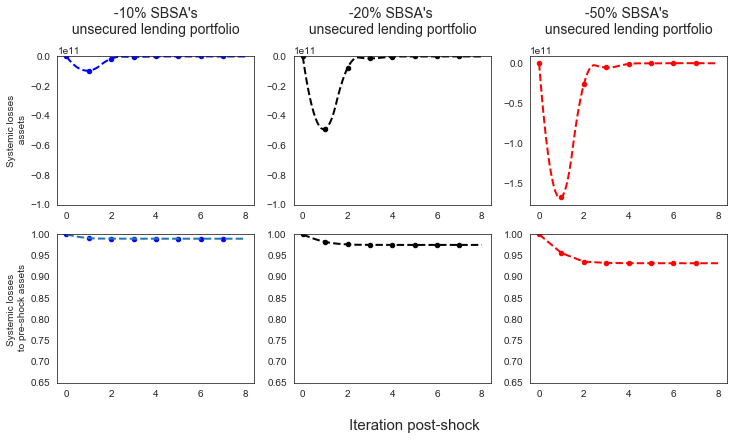

In [3]:
import numpy as np
import pandas as pd
import csv
from matplotlib import cm
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import numpy
from numpy.random import randn
from scipy import array, newaxis
import seaborn as sns
from matplotlib.patches import Rectangle
from scipy.interpolate import InterpolatedUnivariateSpline

sns.set_style("white")

#Only Standard bank! 
#plt.rc('font',**{'family':'sans-serif','sans-serif':['Times New Roman']})

df = pd.read_csv(path)
keys = np.unique(df['shock'])

print(keys)
for key in keys:
    if key == -0.1:
        I1 = np.argwhere(df['shock']==key).squeeze()
    if key == -0.2:
        I2 = np.argwhere(df['shock']==key).squeeze()
    if key == -0.5:
        I3 = np.argwhere(df['shock']==key).squeeze()

#Make x values
x1 = np.array(df['current_step'][I1])
x1new = np.linspace(0, len(x1), num=100)
x2 = np.array(df['current_step'][I2])
x2new = np.linspace(0, len(x1), num=100)
x3 = np.array(df['current_step'][I3])
x3new = np.linspace(0, len(x3), num=100)
 
#Make y values
y1 = df['system_TAS'][I1] 
y2 = df['system_TAS'][I2] 
y3 = df['system_TAS'][I3] 
#Smoothing system TAs
f1 = InterpolatedUnivariateSpline(x1, y1 , k=2)
f2 = InterpolatedUnivariateSpline(x2, y2 , k=2)
f3 = InterpolatedUnivariateSpline(x3, y3 , k=2)

r1 = f1(x1new)
#r1[r1 > 1] = 0
r2 = f2(x2new)
r2[r2 > 0.1] = 0
r3 = f3(x3new)
r3[r3 > 0.1] = 0


y4 = df['asset_to_pre_shock'][I1] 
y5 = df['asset_to_pre_shock'][I2] 
y6 = df['asset_to_pre_shock'][I3] 

#-10
f4 = InterpolatedUnivariateSpline(x1, y4 , k=2)
r4 = f4(x1new)

f5 = InterpolatedUnivariateSpline(x2, y5 , k=2)
r5 = f5(x2new)
f6 = InterpolatedUnivariateSpline(x3, y6 , k=1)
r6 = f6(x3new)

#fig,  ax  = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
fig, axes = plt.subplots(nrows=2, ncols=3,   figsize=(12,6))

#ax = ax1.twinx() # THIS IS for two axesin one chart, not needed
########## 10 % shocl
axes[0][0].plot(x1,y1,'o',  x1new,r1,'--', lw=2,  ms=4.5, color='B', label="-10%")
axes[0][0].set_title(" -10% SBSA's \n unsecured lending portfolio \n", fontsize=14)
axes[0][0].set_ylim(-1e11,0)
axes[1][0].plot(x2,y4,'bo',  x2new, r4, '--', lw=2,  ms=4.5, label="-20%")
axes[1][0].set_ylabel("Systemic losses \n to pre-shock assets")
axes[1][0].set_ylim(0.65,1)


##########
########## 20 % 
axes[0][1].plot(x2,y2,'bo',  x2new,r2,'--', lw=2, color="black", ms=4.5, label="-20%")
axes[0][1].set_title(" -20% SBSA's  \n unsecured lending portfolio \n", fontsize=14)
axes[1][1].plot(x2,y5,'bo',  x2new, r5, '--', lw=2, color="black",  ms=4.5, label="-20%")
axes[1][1].set_ylim(0.65,1)
axes[0][1].set_ylim(-1e11,0)


##########  

########## 50 % 
axes[0][2].plot(x3,y3,'o',  x3new,r3,'--', lw=2,  ms=4.5, color='red', label="-50%")
axes[0][2].set_title(" -50% SBSA's  \n unsecured lending portfolio \n", fontsize=14)

axes[1][2].plot(x3,y6,'o',  x3new,r6,'--', lw=2,  ms=4.5, color='red', label="-50%")
axes[1][2].set_ylim(0.65,1)

xaxis_label = plt.xlabel('\n Iteration post-shock', fontsize=15)
xaxis_label.set_position((-0.6,3)) 

##########  

 

axes[0][0].set_ylabel("Systemic losses\n assets") #, fontsize=15
#fig.savefig('sbsa.pdf', format="pdf") #bbox_inches='tight'
 

plt.show()